<a href="https://colab.research.google.com/github/kiyong21c/Must_Have_pytorch_DL/blob/main/20220901_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CNN을 만들어 사물 이미지를 분류하는 모델 만들기
 - 데이터셋 : CIFAR-10(10가지 클래스를 갖음)
 - 동물, 비행기, 트럭, 자동차 등의 이미지

In [ ]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

# CIFAR-10 데이터셋 불러오기
training_data = CIFAR10(root='./', train=True, download=True, transform=ToTensor())
test_data = CIFAR10(root='./', train=False, download=True, transform=ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
training_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
training_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
type(training_data.data) # numpy 배열이네?

numpy.ndarray

In [ ]:
training_data.data.shape # (N, H, W, C) : 50000개 이미지, 32X32 크기, RGB

(50000, 32, 32, 3)

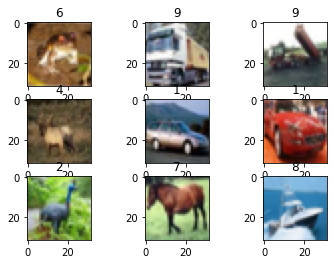

In [ ]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i]);
    plt.title(training_data.targets[i])

### 데이터 증강
 - 데이터가 부족하거나, 오버피팅을 피하는 기법
 - 이미지 크기는 변화시키지 않는다
 - 이미지 일부분을 제거하고 싶다면, 크기를 줄이지 않기위해 제거 영역을 0으로 채운다

In [ ]:
import shutil
# shutil.rmtree('/content/cifar-10-python.tar.gz') # 폴더 삭제

import os
os.remove('/content/cifar-10-python.tar.gz') # 파일 삭제

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified
(50000, 32, 32, 3)


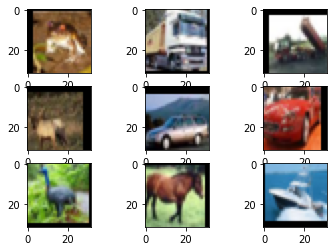

In [1]:
# 데이터 전처리 : 크롭핑과 좌우대칭
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([T.ToPILImage(), # (C x H x W)  →  (H x W x C)
                      RandomCrop((32, 32), padding=4), # (32, 32) : 최종출력크기, padding=4 만큼 임의로 크롭핑
                      RandomHorizontalFlip(p=0.5)])    # 50% 확률로 y축 대칭

training_data = CIFAR10(root='./', train=True, download=True, transform=None)
test_data = CIFAR10(root='./', train=False, download=True, transform=None)

print(training_data.data.shape)

for i in range(9):
    plt.subplot(3, 3, i+1)
    # plt.imshow(training_data.data[i]) # transforms가 적용되어 있지 않다 
    plt.imshow(transforms(training_data.data[i])) # 비로소 transforms가 적용됨

### 이미지 정규화
 - 적(R), 녹(G), 청(B)의 데이터의 분포가 치우쳐져 있으면 학습에 안좋은 영향
 - 정규분포(가우스분포)를 따르도록 정규화

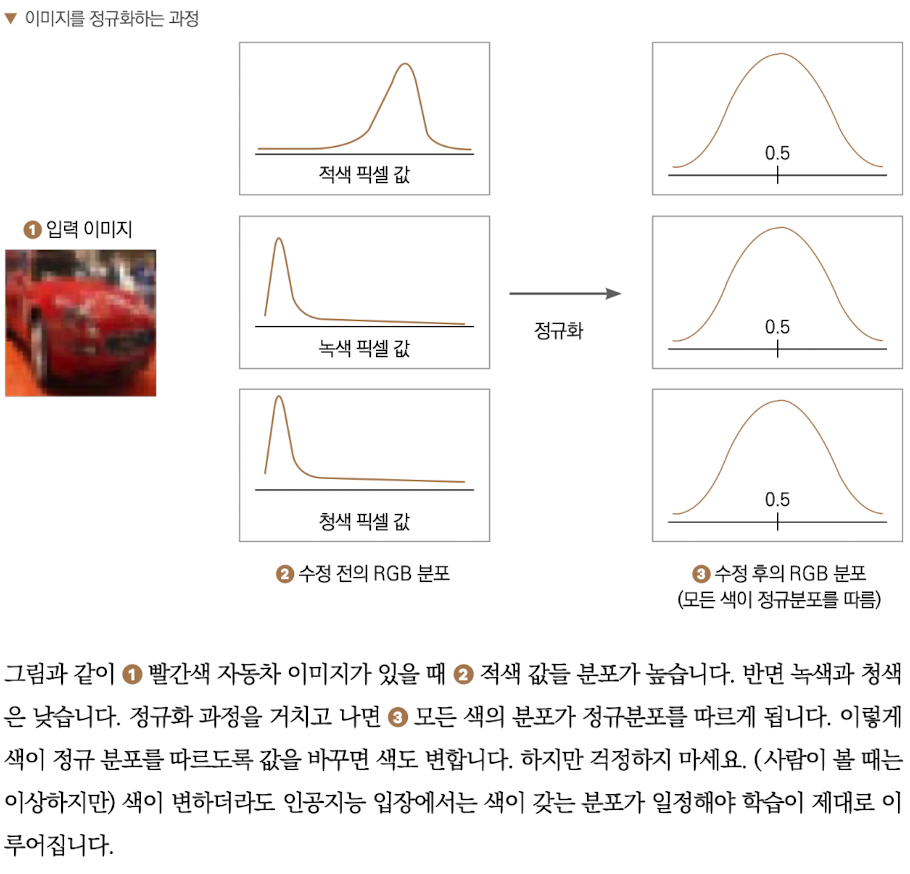

Files already downloaded and verified
Files already downloaded and verified


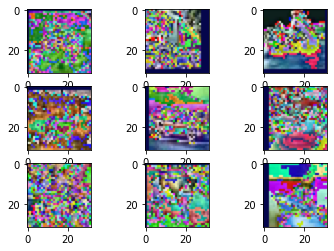

In [34]:
# 데이터 전처리 : 정규화 추가
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

# 데이터 전처리 정의
transforms = Compose([T.ToPILImage(),
                      RandomCrop((32,32), padding=4),
                      RandomHorizontalFlip(p=0.5),
                      T.ToTensor(), # (3, 32, 32) : Cannel, Height, Width
                      Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)), # 텐서타입에서의 연산
                      T.ToPILImage() # (3, 32, 32) → (32, 32, 3) : Height, Width, Channel
                      ])

training_data = CIFAR10(root='./', train=True, download=True, transform=None) # 훈련 데이터 만들때 transform 적용안해도 이후에 적용가능
test_data = CIFAR10(root='./', train=False, download=True, transform=None)  # transforms를 파라미터로 지정해도 적용이 안되네?

# 이미지 표시
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(transforms(training_data.data[i]))

In [20]:
transforms(training_data)

StandardTransform
Transform: Compose(
               ToPILImage()
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))
               ToPILImage()
           )

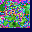

In [35]:
transforms(training_data.data[0])

In [36]:
training_data.data[0].shape

(32, 32, 3)